In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
from numpy import log2
from scipy.special import logsumexp

# Problem 9.4: plug-in estimator vs. mixture

In [2]:
Ns = np.arange(1, 1000)

In [3]:
asymptotic_behavior = .5*log2(Ns/(2*np.pi*np.e))/Ns
x = 0
P = 1
sigma2 = 2
xmap_exp_div = log2(np.e)/(2*sigma2) * ((Ns*P/(sigma2+Ns*P))**2 * sigma2/Ns + (sigma2/(sigma2+Ns*P))**2 * x**2)
jeffreys_exp_div = -.5*log2(1 + (P/sigma2)/(1+Ns*P/sigma2)) + log2(np.e)/2 * P/sigma2/(1+Ns*P/sigma2) + xmap_exp_div

xmap_avg_errors = np.cumsum(xmap_exp_div)/Ns
jeffreys_avg_errors = np.cumsum(jeffreys_exp_div)/Ns

Compare the average expected approximation loss of the plug-in predictor and the mixture predictor to each other and to the asymptotic model capacity bound 

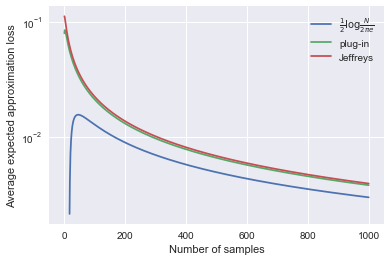

In [4]:
plt.plot(Ns, asymptotic_behavior, label=r'$\frac{1}{2} \log\frac{N}{2\pi e}$');
plt.plot(Ns, xmap_avg_errors, label='plug-in');
plt.plot(Ns, jeffreys_avg_errors, label='Jeffreys');
plt.yscale('log');
plt.legend();
plt.xlabel('Number of samples');
plt.ylabel('Average expected approximation loss');

# Universal Prediction of coin flips

Simulate coin flips

In [5]:
n = 30
np.random.seed(1729)
ys = np.random.binomial(1, .25, n)
n1 = np.sum(ys)
if n < 10:
    print(ys)

Parameter classes

In [6]:
x1s = [.25, .5, .75]
x2s = np.linspace(0.01, .99, 999)

## Predict with $\mathcal{X}_1$

In [7]:
mix1_prob_y1_unnorm = 1/len(x1s)*sum(x**(n1+1)*(1-x)**(n-n1) for x in x1s)
mix1_prob_y0_unnorm = 1/len(x1s)*sum(x**(n1)*(1-x)**(n-n1+1) for x in x1s)
mix1_prob_y1 = mix1_prob_y1_unnorm/(mix1_prob_y1_unnorm+mix1_prob_y0_unnorm)

# Log domain is better for long sequences
mix1_logprob_y1_unnorm = np.log(1/len(x1s))+logsumexp([(
    n1+1)*np.log(x) + (n-n1)*np.log(1-x) for x in x1s
])
mix1_logprob_y0_unnorm = np.log(1/len(x1s))+logsumexp([
    n1*np.log(x) + (n-n1+1)*np.log(1-x) for x in x1s
])
mix1_prob_y1_ = np.exp(mix1_logprob_y1_unnorm - logsumexp([mix1_logprob_y1_unnorm, mix1_logprob_y0_unnorm]))

Get very close to a prediction from the true model

In [8]:
print(mix1_prob_y1)
print(mix1_prob_y1_)

0.250105561099305
0.2501055610993046


## Predict with $\mathcal{X}_2$

In [9]:
mix2_prob_y1_unnorm = 1/len(x2s)*sum(x**(n1+1)*(1-x)**(n-n1) for x in x2s)
mix2_prob_y0_unnorm = 1/len(x2s)*sum(x**(n1)*(1-x)**(n-n1+1) for x in x2s)
mix2_prob_y1 = mix2_prob_y1_unnorm/(mix2_prob_y1_unnorm+mix2_prob_y0_unnorm)

mix2_logprob_y1_unnorm = np.log(1/len(x2s))+logsumexp([
    (n1+1)*np.log(x) + (n-n1)*np.log(1-x) for x in x2s
])
mix2_logprob_y0_unnorm = np.log(1/len(x2s))+logsumexp([
    n1*np.log(x) + (n-n1+1)*np.log(1-x) for x in x2s
])
mix2_prob_y1_ = np.exp(mix2_logprob_y1_unnorm - logsumexp([mix2_logprob_y1_unnorm, mix2_logprob_y0_unnorm]))

Prediction is further from true model

In [10]:
print(mix2_prob_y1)
print(mix2_prob_y1_)

0.1562515823690603
0.15625158236905967


## Doubly Universal Prediction

Mixture weights for the two models

In [11]:
w1 = .5
w2 = 1 - w1

Mix the mixture distributions

In [12]:
double_prob_y1_unnorm = w1*mix1_prob_y1_unnorm + w2*mix2_prob_y1_unnorm
double_prob_y0_unnorm = w1*mix1_prob_y0_unnorm + w2*mix2_prob_y0_unnorm
double_prob_y1 = double_prob_y1_unnorm/(double_prob_y1_unnorm+double_prob_y0_unnorm)

double_logprob_y1_unnorm = logsumexp([
    np.log(w1) + mix1_logprob_y1_unnorm, 
    np.log(w2) + mix2_logprob_y1_unnorm
])
double_logprob_y0_unnorm = logsumexp([
    np.log(w1) + mix1_logprob_y0_unnorm, 
    np.log(w2) + mix2_logprob_y0_unnorm
])
double_prob_y1_ = np.exp(double_logprob_y1_unnorm - logsumexp([double_logprob_y1_unnorm, double_logprob_y0_unnorm]))

Not as good as using just $\mathcal{X}_1$, but better than using $\mathcal{X}_2$

In [13]:
print(double_prob_y1)
print(double_prob_y1_)

0.1919099995646388
0.19190999956463836
